In [2]:
import pandas as pd
data = pd.read_csv('Updated_Stroke_Prediction_Data_Ratio Features.csv')
data

,Age,Hypertension,Heart_disease,Ever_married,Avg_glucose_level,BMI,Smoking_status
0,78,1,0,1,56.11,25.5,1
1,39,1,0,1,58.09,39.2,2
2,78,0,0,1,58.57,24.2,1
3,82,0,0,1,59.32,33.2,0
4,70,0,1,1,59.35,32.3,1
...,...,...,...,...,...,...,...
4068,68,0,0,1,91.68,40.8,2
4069,82,1,0,1,71.97,28.3,0
4070,57,0,0,1,77.93,21.7,0
4071,18,0,0,0,82.85,46.9,1


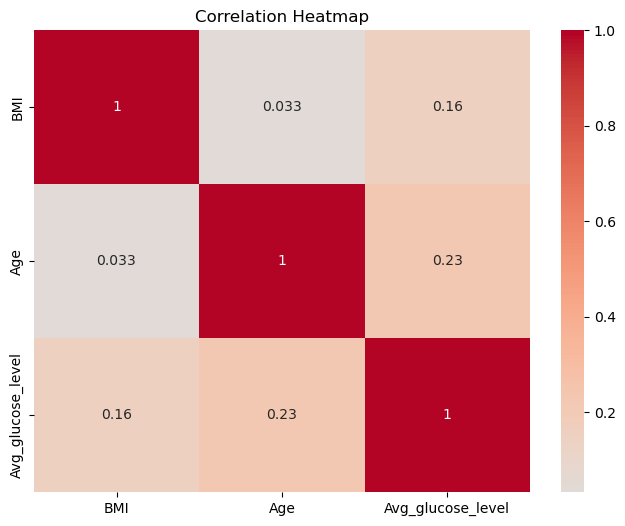

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
# Correlation Heatmap
plt.figure(figsize=(8, 6))
# Compute the correlation matrix for numerical columns
corr = data[['BMI', 'Age', 'Avg_glucose_level']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

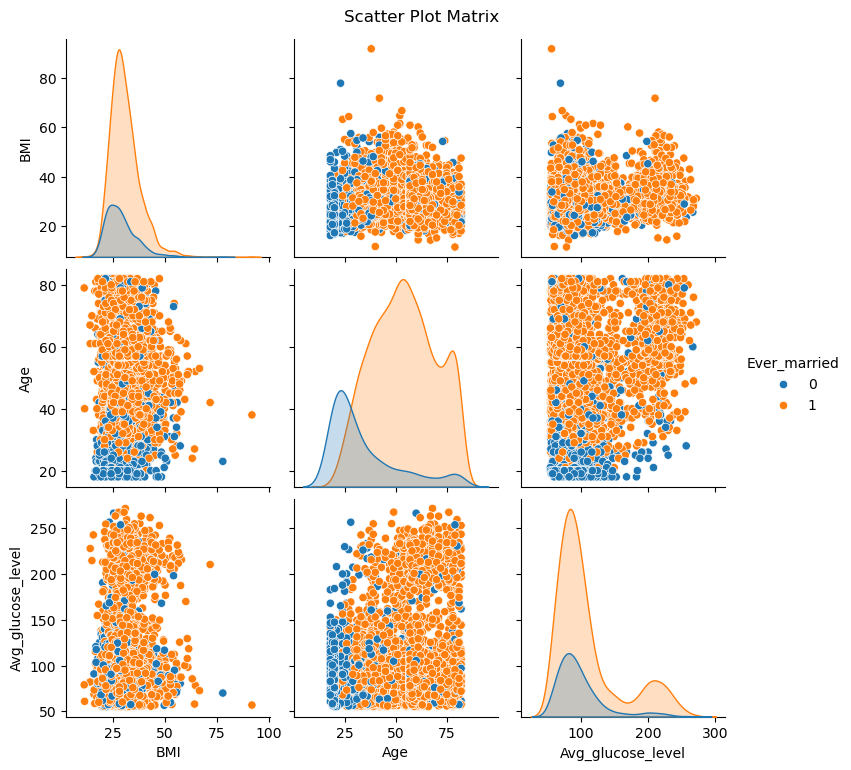

In [20]:
# Pairplot (Scatter Plot Matrix)
sns.pairplot(data, vars=['BMI', 'Age','Avg_glucose_level'], hue='Ever_married', diag_kind='kde')
plt.suptitle('Scatter Plot Matrix', y=1.02)
plt.show()

In [32]:
import pandas as pd
data = pd.read_csv('Updated_Stroke_Prediction_Data_Ratio Features.csv')
data

,Age,Hypertension,Heart_disease,Ever_married,Avg_glucose_level,BMI,Smoking_status,Stroke
0,78,1,0,1,56.11,25.5,1,1
1,39,1,0,1,58.09,39.2,2,1
2,78,0,0,1,58.57,24.2,1,1
3,82,0,0,1,59.32,33.2,0,1
4,70,0,1,1,59.35,32.3,1,1
...,...,...,...,...,...,...,...,...
4068,68,0,0,1,91.68,40.8,2,0
4069,82,1,0,1,71.97,28.3,0,0
4070,57,0,0,1,77.93,21.7,0,0
4071,18,0,0,0,82.85,46.9,1,0


In [30]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

In [60]:
data = pd.read_csv("Updated_Stroke_Prediction_Data_Ratio Features.csv")
data

,Age,Hypertension,Heart_disease,Ever_married,Avg_glucose_level,BMI,Smoking_status
0,78,1,0,1,56.11,25.5,1
1,39,1,0,1,58.09,39.2,2
2,78,0,0,1,58.57,24.2,1
3,82,0,0,1,59.32,33.2,0
4,70,0,1,1,59.35,32.3,1
...,...,...,...,...,...,...,...
4068,68,0,0,1,91.68,40.8,2
4069,82,1,0,1,71.97,28.3,0
4070,57,0,0,1,77.93,21.7,0
4071,18,0,0,0,82.85,46.9,1


In [61]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from sklearn.preprocessing import StandardScaler

# Select relevant features for clustering
features = data[['Age', 'Avg_glucose_level', 'BMI']]

# Standardize the features for better clustering performance
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Perform K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(scaled_features)

# Calculate the Davies-Bouldin Index
dbi = davies_bouldin_score(scaled_features, labels)

print(f"Davies-Bouldin Index: {dbi}")

Davies-Bouldin Index: 1.1824605399316204


In [4]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.preprocessing import StandardScaler

# Select relevant features for clustering
features = data[['Age', 'Avg_glucose_level', 'BMI','Smoking_status','Hypertension','Heart_disease','Ever_married']]

# Standardize the features for better clustering performance
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Perform K-Means clustering
kmeans = KMeans(n_clusters=8, random_state=100)
labels = kmeans.fit_predict(scaled_features)

# Calculate the Davies-Bouldin Index
dbi = davies_bouldin_score(scaled_features, labels)

# Calculate the Silhouette Score
silhouette = silhouette_score(scaled_features, labels)

print(f"Davies-Bouldin Index: {dbi}")
print(f"Silhouette Score: {silhouette}")

Davies-Bouldin Index: 1.1475093685786693
Silhouette Score: 0.29944530746597525


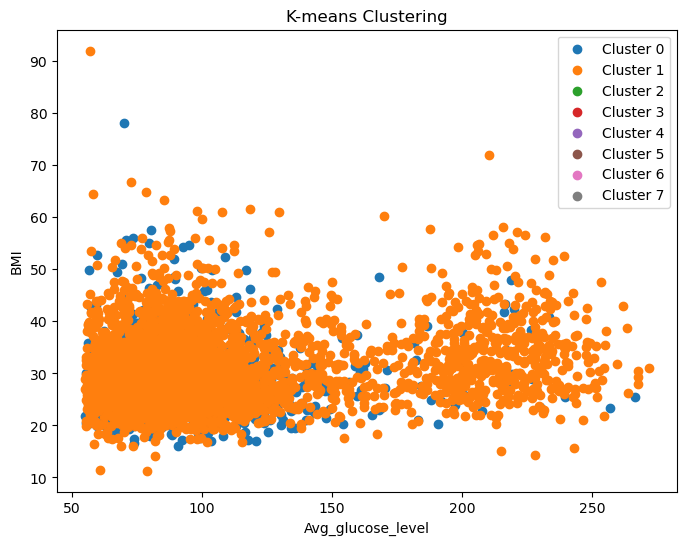

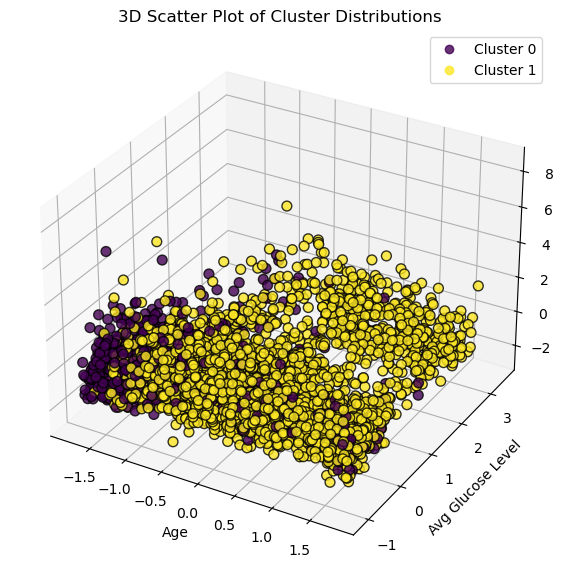

In [181]:
# Visualize the clusters in the original feature space
plt.figure(figsize=(8, 6))

for cluster in range(8):
    plt.scatter(data[data['Cluster'] == cluster]['Avg_glucose_level'], data[data['Cluster'] == cluster]['BMI'], label=f'Cluster {cluster}')

plt.title('K-means Clustering')
plt.xlabel('Avg_glucose_level')
plt.ylabel('BMI')
plt.legend()
plt.show()



In [114]:
# Inspect the data
print("Dataset Loaded Successfully.")
print("First 5 rows of the dataset:")
print(data.head())

# Drop non-numeric columns if any (clustering requires numeric data)
data_numeric = data.select_dtypes(include=['number'])

# Handle missing values (if any) by filling them with the mean of the column
data_numeric = data_numeric.fillna(data_numeric.mean())

# Dictionary to store the cluster counts for each k
cluster_counts = {}

# Perform k-means clustering for k = 2 to 9
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_numeric)
    
    # Get the cluster labels
    labels = kmeans.labels_
    
    # Count the number of observations in each cluster
    cluster_counts[k] = pd.Series(labels).value_counts().to_dict()

# Print the cluster counts for each k
for k, counts in cluster_counts.items():
    print(f"\nNumber of observations in each cluster for k={k}:")
    for cluster, count in counts.items():
        print(f"Cluster {cluster}: {count} observations")


Dataset Loaded Successfully.
First 5 rows of the dataset:
   Age  Hypertension  Heart_disease  Ever_married  Avg_glucose_level   BMI  \
0   78             1              0             1              56.11  25.5   
1   39             1              0             1              58.09  39.2   
2   78             0              0             1              58.57  24.2   
3   82             0              0             1              59.32  33.2   
4   70             0              1             1              59.35  32.3   

   Smoking_status  cluster  
0               1        2  
1               2        2  
2               1        2  
3               0        2  
4               1        2  

Number of observations in each cluster for k=2:
Cluster 0: 3417 observations
Cluster 1: 656 observations

Number of observations in each cluster for k=3:
Cluster 0: 2303 observations
Cluster 2: 1201 observations
Cluster 1: 569 observations

Number of observations in each cluster for k=4:
Cluster 0

In [117]:
import pandas as pd
from sklearn.cluster import KMeans

# Inspect the data
print("Dataset Loaded Successfully.")
print("First 5 rows of the dataset:")
print(data.head())

# Drop non-numeric columns if any (clustering requires numeric data)
data_numeric = data.select_dtypes(include=['number'])

# Handle missing values (if any) by filling them with the mean of the column
data_numeric = data_numeric.fillna(data_numeric.mean())

# Add a dictionary to store labels for each k
all_cluster_labels = {}

# Perform k-means clustering for k = 2 to 9
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_numeric)
    
    # Store the cluster labels for each k
    all_cluster_labels[f'Cluster_k={k}'] = kmeans.labels_

# Convert the original dataset to a new DataFrame and add cluster labels
clustered_data = data.copy()
for col_name, labels in all_cluster_labels.items():
    clustered_data[col_name] = labels

# Save the new dataset with cluster labels to a CSV file
output_file = 'clustered_data.csv'
clustered_data.to_csv(output_file, index=False)

print(f"\nCluster allocations have been saved to '{output_file}'.")


Dataset Loaded Successfully.
First 5 rows of the dataset:
   Age  Hypertension  Heart_disease  Ever_married  Avg_glucose_level   BMI  \
0   78             1              0             1              56.11  25.5   
1   39             1              0             1              58.09  39.2   
2   78             0              0             1              58.57  24.2   
3   82             0              0             1              59.32  33.2   
4   70             0              1             1              59.35  32.3   

   Smoking_status  cluster  
0               1        2  
1               2        2  
2               1        2  
3               0        2  
4               1        2  

Cluster allocations have been saved to 'clustered_data.csv'.


In [119]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Selecting relevant numerical features for clustering
numerical_features = data[['Age', 'Hypertension', 'Heart_disease', 
                           'Ever_married', 'Avg_glucose_level', 'BMI', 'Smoking_status']]

# Standardizing the numerical features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(numerical_features)

# DBSCAN clustering
# Define a function to perform DBSCAN and evaluate results
def dbscan_analysis(X, eps_values, min_samples_values):
    results = []

    for eps in eps_values:
        for min_samples in min_samples_values:
            # Perform DBSCAN
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            labels = dbscan.fit_predict(X)

            # Ignore cases where all points are noise
            if len(set(labels)) <= 1:
                continue

            # Compute evaluation metrics
            silhouette = silhouette_score(X, labels) if len(set(labels)) > 1 else -1
            davies_bouldin = davies_bouldin_score(X, labels)

            results.append((eps, min_samples, len(set(labels)), silhouette, davies_bouldin))

    # Convert results to a DataFrame for easier analysis
    results_df = pd.DataFrame(results, columns=['eps', 'min_samples', 'n_clusters', 'Silhouette', 'Davies_Bouldin'])
    return results_df

# Define parameter ranges for DBSCAN
eps_values = [0.5, 1.0, 1.5, 2.0]
min_samples_values = [5, 10, 15, 20]

# Perform DBSCAN analysis
results_df = dbscan_analysis(scaled_features, eps_values, min_samples_values)

# Sort by Silhouette score to find the best configuration
best_results = results_df.sort_values(by='Silhouette', ascending=False)

# Save the results to a CSV file
output_file = 'dbscan_results.csv'
results_df.to_csv(output_file, index=False)

# Display the top configurations
print(best_results.head())


    eps  min_samples  n_clusters  Silhouette  Davies_Bouldin
11  1.5           20           5    0.329674        1.653715
13  2.0           10           7    0.328678        1.492985
14  2.0           15           7    0.328179        1.488332
12  2.0            5           8    0.327673        1.555865
15  2.0           20           7    0.326211        1.536945


    eps  min_samples  n_clusters  Silhouette  Davies_Bouldin  \
20  1.5           20           5    0.329674        1.653715   
25  2.0           10           7    0.328678        1.492985   
26  2.0           15           7    0.328179        1.488332   
21  2.0            3           9    0.327880        1.429355   
24  2.0            6           8    0.327673        1.555865   

                              Model  
20  DBSCAN(eps=1.5, min_samples=20)  
25  DBSCAN(eps=2.0, min_samples=10)  
26  DBSCAN(eps=2.0, min_samples=15)  
21   DBSCAN(eps=2.0, min_samples=3)  
24   DBSCAN(eps=2.0, min_samples=6)  
Clustered data with labels saved to dbscan_clustered_data2.csv


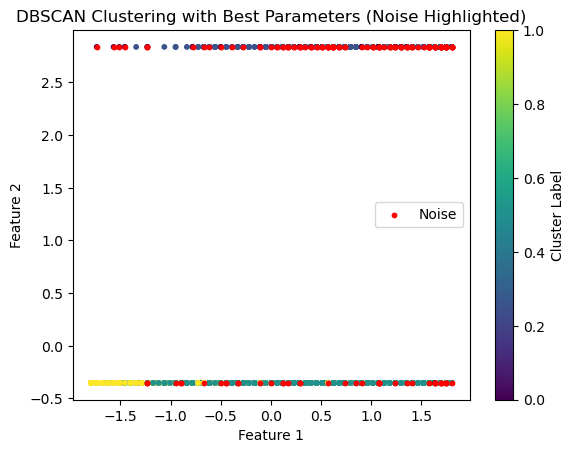

In [124]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt

# Selecting relevant numerical features for clustering
numerical_features = data[['Age', 'Hypertension', 'Heart_disease', 
                           'Ever_married', 'Avg_glucose_level', 'BMI', 'Smoking_status']]

# Standardizing the numerical features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(numerical_features)

# DBSCAN clustering
# Define a function to perform DBSCAN and evaluate results
def dbscan_analysis(X, eps_values, min_samples_values):
    results = []

    for eps in eps_values:
        for min_samples in min_samples_values:
            # Perform DBSCAN
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            labels = dbscan.fit_predict(X)

            # Ignore cases where all points are noise
            if len(set(labels)) <= 1:
                continue

            # Compute evaluation metrics
            silhouette = silhouette_score(X, labels) if len(set(labels)) > 1 else -1
            davies_bouldin = davies_bouldin_score(X, labels)

            results.append((eps, min_samples, len(set(labels)), silhouette, davies_bouldin, dbscan))

    # Convert results to a DataFrame for easier analysis
    results_df = pd.DataFrame(results, columns=['eps', 'min_samples', 'n_clusters', 'Silhouette', 'Davies_Bouldin', 'Model'])
    return results_df

# Define parameter ranges for DBSCAN
eps_values = [0.5, 1.0, 1.5, 2.0]
min_samples_values = [3,4, 5, 6, 10, 15, 20]

# Perform DBSCAN analysis
results_df = dbscan_analysis(scaled_features, eps_values, min_samples_values)

# Sort by Silhouette score to find the best configuration
best_results = results_df.sort_values(by='Silhouette', ascending=False)

# Save the results to a CSV file
output_file = 'dbscan_results_new.csv'
results_df.drop(columns=['Model']).to_csv(output_file, index=False)


# Display the top configurations
print(best_results.head())

# Visualize the best model's clusters
best_model = best_results.iloc[0]['Model']
best_labels = best_model.labels_

# Add cluster labels to the original dataset
data['Cluster'] = best_labels

# Save the dataset with cluster labels

output_file_path = 'dbscan_clustered_data2.csv'
data.to_csv(output_file_path, index=False)
print(f"Clustered data with labels saved to {output_file_path}")

# Visualize clusters with noise highlighted
plt.scatter(scaled_features[:, 0], scaled_features[:, 1], c=best_labels, cmap='viridis', s=10)
plt.title("DBSCAN Clustering with Best Parameters (Noise Highlighted)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

# Highlight noise points in red
noise_indices = best_labels == -1
plt.scatter(scaled_features[noise_indices, 0], scaled_features[noise_indices, 1], color='red', s=10, label='Noise')

plt.legend()
plt.colorbar(label='Cluster Label')
plt.show()


In [126]:
pip install scikit-learn-extra


     -------------------------------------- 343.0/343.0 kB 1.3 MB/s eta 0:00:00


For k=2, Silhouette Score=0.6741176249822037, Davies Bouldin Score=0.4740726001873314
For k=3, Silhouette Score=0.3380145985050114, Davies Bouldin Score=1.0728006821668017
For k=4, Silhouette Score=0.36489154806749763, Davies Bouldin Score=0.8475656200843701
For k=5, Silhouette Score=0.3451014373654048, Davies Bouldin Score=0.9621843246576589
For k=6, Silhouette Score=0.31776248134905033, Davies Bouldin Score=0.9671887254063759
For k=7, Silhouette Score=0.31320702153203067, Davies Bouldin Score=0.9603403721761283
For k=8, Silhouette Score=0.2992299551506399, Davies Bouldin Score=1.0207555107296002
For k=9, Silhouette Score=0.2960726682182069, Davies Bouldin Score=1.1087350051718752


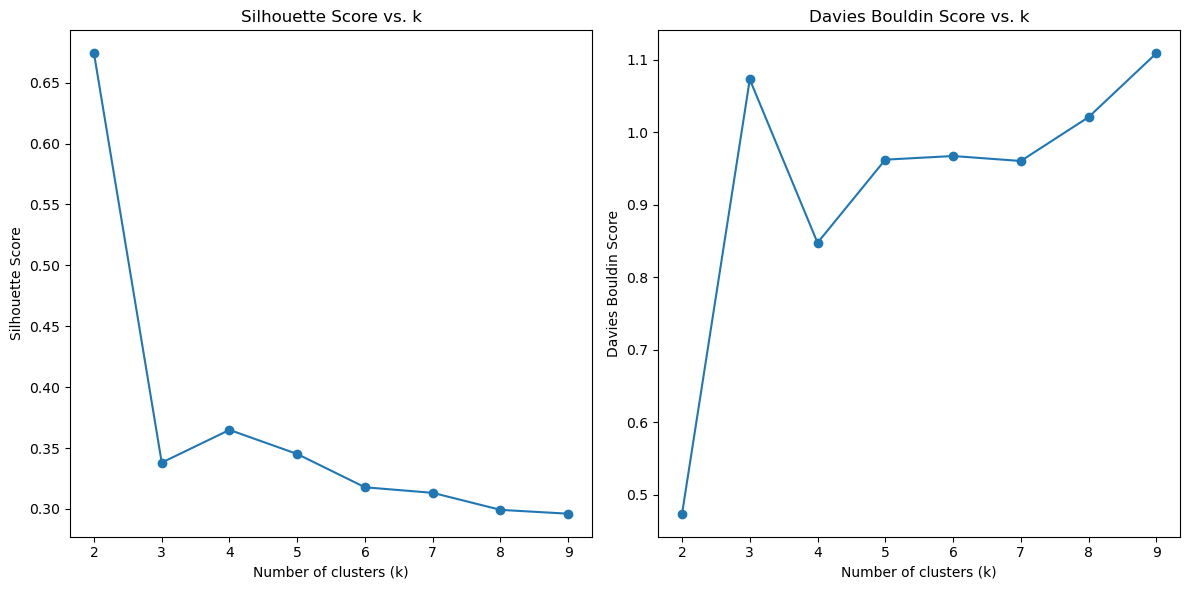

In [129]:
import pandas as pd
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn_extra.cluster import KMedoids
import matplotlib.pyplot as plt

# Function to compute k-medoids and calculate silhouette index and davies bouldin score
def compute_k_medoids(data, k_values):
    results = []
    for k in k_values:
        # Initialize KMedoids with the current value of k
        kmedoids = KMedoids(n_clusters=k, random_state=0)
        
        # Fit the model
        labels = kmedoids.fit_predict(data)
        
        # Calculate silhouette score
        silhouette_avg = silhouette_score(data, labels)
        
        # Calculate davies bouldin score
        davies_bouldin_avg = davies_bouldin_score(data, labels)
        
        # Append the results
        results.append((k, silhouette_avg, davies_bouldin_avg))
    
    return results

# Define the range of k values to test
k_values = [2, 3, 4, 5,6,7,8,9]

# Compute k-medoids for the defined range of k values
results = compute_k_medoids(data, k_values)

# Print the results
for result in results:
    print(f'For k={result[0]}, Silhouette Score={result[1]}, Davies Bouldin Score={result[2]}')

# Plotting the results
k_vals = [result[0] for result in results]
silhouette_scores = [result[1] for result in results]
davies_bouldin_scores = [result[2] for result in results]

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(k_vals, silhouette_scores, marker='o')
plt.title('Silhouette Score vs. k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')

plt.subplot(1, 2, 2)
plt.plot(k_vals, davies_bouldin_scores, marker='o')
plt.title('Davies Bouldin Score vs. k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Davies Bouldin Score')

plt.tight_layout()
plt.show()

In [150]:
import pandas as pd
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn_extra.cluster import KMedoids

# Load the dataset
data = pd.read_csv('Updated_Stroke_Prediction_Data_Encoded.csv')

# Select relevant features for clustering
features = data[['Age', 'Avg_glucose_level', 'BMI', 'Smoking_status', 'Hypertension', 'Heart_disease', 'Ever_married']]

# Standardize the features for better clustering performance
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Perform K-Medoids clustering
kmedoids = KMedoids(n_clusters=2, random_state=0)
labels = kmedoids.fit_predict(scaled_features)

# Calculate the Davies-Bouldin Index
dbi = davies_bouldin_score(scaled_features, labels)

# Calculate the Silhouette Score
silhouette = silhouette_score(scaled_features, labels)

print(f"Davies-Bouldin Index: {dbi}")
print(f"Silhouette Score: {silhouette}")


Davies-Bouldin Index: 2.1829685084722885
Silhouette Score: 0.14073963973557463


In [132]:
pip install scikit-learn-extra

In [133]:
import pandas as pd
from sklearn_extra.cluster import KMedoids
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [134]:
# Load the dataset
data = pd.read_csv('Updated_Stroke_Prediction_Data_Encoded.csv')
data

,Patient ID,Gender,Age,Hypertension,Heart_disease,Ever_married,Residence_type,Avg_glucose_level,BMI,Smoking_status,Stroke
0,36841,Male,78,1,0,1,Rural,56.11,25.5,1,1
1,36338,Female,39,1,0,1,Rural,58.09,39.2,2,1
2,60491,Female,78,0,0,1,Urban,58.57,24.2,1,1
3,38829,Female,82,0,0,1,Rural,59.32,33.2,0,1
4,71796,Female,70,0,1,1,Rural,59.35,32.3,1,1
...,...,...,...,...,...,...,...,...,...,...,...
4068,64520,Male,68,0,0,1,Urban,91.68,40.8,2,0
4069,68398,Male,82,1,0,1,Rural,71.97,28.3,0,0
4070,45010,Female,57,0,0,1,Rural,77.93,21.7,0,0
4071,22127,Female,18,0,0,0,Urban,82.85,46.9,1,0


In [135]:
# Extract the relevant features (columns) from your dataset
features = data[['Age', 'Avg_glucose_level', 'BMI', 'Smoking_status', 'Hypertension', 'Heart_disease', 'Ever_married']]
features

,Age,Avg_glucose_level,BMI,Smoking_status,Hypertension,Heart_disease,Ever_married
0,78,56.11,25.5,1,1,0,1
1,39,58.09,39.2,2,1,0,1
2,78,58.57,24.2,1,0,0,1
3,82,59.32,33.2,0,0,0,1
4,70,59.35,32.3,1,0,1,1
...,...,...,...,...,...,...,...
4068,68,91.68,40.8,2,0,0,1
4069,82,71.97,28.3,0,1,0,1
4070,57,77.93,21.7,0,0,0,1
4071,18,82.85,46.9,1,0,0,0


In [136]:
# Standardize the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(features)

In [140]:
# Initialize and fit the KMedoids model
k =7  # Number of clusters (you can change this)
kmedoids = KMedoids(n_clusters=k, random_state=0)
kmedoids.fit(scaled_data)


KMedoids(n_clusters=7, random_state=0)

In [151]:
import pandas as pd
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn_extra.cluster import KMedoids

# Load the dataset
data = pd.read_csv('Updated_Stroke_Prediction_Data_Encoded.csv')

# Select relevant features for clustering
features = data[['Age', 'Avg_glucose_level', 'BMI', 'Smoking_status', 'Hypertension', 'Heart_disease', 'Ever_married']]

# Standardize the features for better clustering performance
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Iterate over different cluster sizes (from 2 to 9)
for n_clusters in range(2, 10):
    # Perform K-Medoids clustering
    kmedoids = KMedoids(n_clusters=n_clusters, random_state=0)
    labels = kmedoids.fit_predict(scaled_features)
    
    # Assign cluster labels to the original dataset
    data[f'Cluster_{n_clusters}'] = labels

    # Calculate evaluation metrics
    dbi = davies_bouldin_score(scaled_features, labels)
    silhouette = silhouette_score(scaled_features, labels)
    print(f"n_clusters={n_clusters}: Davies-Bouldin Index={dbi:.4f}, Silhouette Score={silhouette:.4f}")

# Save the dataset with cluster assignments
data.to_csv('Clustered_Stroke_Prediction_Data.csv', index=False)
print("Cluster assignments saved to 'Clustered_Stroke_Prediction_Data.csv'.")


n_clusters=2: Davies-Bouldin Index=2.1830, Silhouette Score=0.1407
n_clusters=3: Davies-Bouldin Index=2.1902, Silhouette Score=0.1361
n_clusters=4: Davies-Bouldin Index=2.7571, Silhouette Score=0.0823
n_clusters=5: Davies-Bouldin Index=2.4014, Silhouette Score=0.1032
n_clusters=6: Davies-Bouldin Index=1.6013, Silhouette Score=0.2063
n_clusters=7: Davies-Bouldin Index=2.4434, Silhouette Score=0.1356
n_clusters=8: Davies-Bouldin Index=2.7101, Silhouette Score=0.0826
n_clusters=9: Davies-Bouldin Index=2.6534, Silhouette Score=0.0785
Cluster assignments saved to 'Clustered_Stroke_Prediction_Data.csv'.


In [152]:
import pandas as pd

# Load the clustered dataset
clustered_data = pd.read_csv('Clustered_Stroke_Prediction_Data.csv')

# Create a summary of cluster counts for each value of n_clusters
summary = {}
for n_clusters in range(2, 10):
    column_name = f'Cluster_{n_clusters}'
    cluster_counts = clustered_data[column_name].value_counts().sort_index()
    summary[column_name] = cluster_counts

# Convert the summary to a DataFrame for better presentation
cluster_summary_df = pd.DataFrame(summary).fillna(0).astype(int)

# Save the summary to a CSV file
cluster_summary_df.to_csv('Cluster_Counts_KMedloids.csv', index_label='Cluster')
print("Cluster counts saved to 'Cluster_Counts.csv'.")


Cluster counts saved to 'Cluster_Counts.csv'.


In [162]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.preprocessing import StandardScaler

# Load dataset
data = pd.read_csv('Updated_Stroke_Prediction_Data_Encoded.csv')

# Select relevant features
features = ['Age', 'Avg_glucose_level', 'BMI', 'Smoking_status', 'Hypertension', 'Heart_disease', 'Ever_married']
data = data[features]
# Handle missing values (if any)
data = data.dropna()

# Normalize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Define ranges for epsilon and min_samples
epsilon_values = np.linspace(0.1, 1.0, 10)
min_samples_values = range(3, 11)

# Store results
results = []

# Perform DBSCAN for each combination of epsilon and min_samples
best_combination = None
best_silhouette = -1
best_db_score = float('inf')

for epsilon in epsilon_values:
    for min_samples in min_samples_values:
        try:
            # Apply DBSCAN
            dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
            labels = dbscan.fit_predict(data_scaled)

            # Check if valid clusters are formed
            if len(set(labels)) > 1 and -1 in labels:
                # Compute metrics
                db_score = davies_bouldin_score(data_scaled, labels)
                silhouette = silhouette_score(data_scaled, labels)
                k = len(set(labels)) - (1 if -1 in labels else 0)  # Exclude noise cluster

                # Append results
                results.append({
                    'epsilon': epsilon,
                    'min_samples': min_samples,
                    'davies_bouldin_score': db_score,
                    'silhouette_score': silhouette,
                    'k': k
                })

                # Update best combination
                if silhouette > best_silhouette or (silhouette == best_silhouette and db_score < best_db_score):
                    best_silhouette = silhouette
                    best_db_score = db_score
                    best_combination = {'epsilon': epsilon, 'min_samples': min_samples, 'k': k, 'silhouette': silhouette, 'davies_bouldin': db_score}
        except Exception as e:
            print(f"Error with epsilon={epsilon}, min_samples={min_samples}: {e}")

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Save results to a CSV file
output_path = 'New dbscan_analysis_results.csv'
results_df.to_csv(output_path, index=False, columns=['epsilon', 'min_samples', 'k', 'davies_bouldin_score', 'silhouette_score'])

# Print the best combination
if best_combination:
    print(f"Best Combination: Epsilon={best_combination['epsilon']}, Min Points={best_combination['min_samples']}, Clusters (k)={best_combination['k']}, "
          f"Silhouette={best_combination['silhouette']:.4f}, Davies-Bouldin={best_combination['davies_bouldin']:.4f}")
else:
    print("No valid combination found.")

print(f"Analysis complete. Results saved to {output_path}")



Best Combination: Epsilon=1.0, Min Points=6, Clusters (k)=18, Silhouette=0.1658, Davies-Bouldin=1.7240
Analysis complete. Results saved to New dbscan_analysis_results.csv
